In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
from sklearn.linear_model import LogisticRegression

In [78]:
#### Read in dataset from source
lm = LogisticRegression()
df_raw = pd.read_csv("icrowdfunding3.csv")
df = df_raw.dropna()
print df.head()

   Target_Raise  Total_Invested_Raised  Pre_Issue_Market_Cap  Success  \
0        400000                 150000              10000000        0   
1         50000                      0                     0        0   
2       1500000                 485822               5000000        0   
3        100000                      0                666000        0   
4         10000                      0                     0        0   

   Strength  
0         1  
1         1  
2         1  
3         1  
4         1  


In [4]:
#### Data Dictionary:

In [5]:
#### Variable

In [6]:
#### Success

In [7]:
#### Description - 0 = not successful 1 = successful

In [8]:
#### Type of Variable - Categorical

In [9]:
#### Variable

In [10]:
#### Strength

In [11]:
#### Description Industry Leading Portal - 1 = no strength 2 = low strength 3 = good strength 4 = high strength

In [12]:
#### Type of Variable - Categorical

In [13]:
#### Variable

In [14]:
#### Gender

In [15]:
#### Description Imputed from Women_Led_PIPR - 0 = female 1 = male

In [16]:
#### Type of Variable - Categorical

In [17]:
#### Variable

In [18]:
#### Sector

In [19]:
#### Description - Sector Category (Must Transform)

In [20]:
#### Type of Variable - Categorical

In [21]:
#### Variable

In [22]:
#### Subsector

In [23]:
#### Description - Subsector Category (Must Transform)

In [24]:
#### Type of Variable - Categorical

In [25]:
#### Variable

In [26]:
#### Security_Type

In [27]:
#### Description Security Type Category (Must Transform)

In [28]:
#### Type of Variable - Categorical

In [29]:
#### Variable

In [30]:
#### Target_Raise

In [31]:
#### Description Investment Crowdfunding Target

In [32]:
#### Type of Variable - Continuous

In [33]:
#### Variable

In [34]:
#### Pre_Issue_Market_Cap

In [35]:
#### Description Pre-Money Valuation

In [36]:
#### Type of Variable - Continuous

In [37]:
#### Exploratory Analysis:

In [79]:
#### Number of observations/records in dataset
df.count()

Target_Raise             3021
Total_Invested_Raised    3021
Pre_Issue_Market_Cap     3021
Success                  3021
Strength                 3021
dtype: int64

In [80]:
#### Summary Table
print df.describe()

       Target_Raise  Total_Invested_Raised  Pre_Issue_Market_Cap      Success  \
count  3.021000e+03           3.021000e+03          3.021000e+03  3021.000000   
mean   2.589263e+06           2.484906e+05          3.663687e+06     0.037736   
std    4.102955e+07           1.268555e+06          4.201926e+07     0.190588   
min    0.000000e+00           0.000000e+00          0.000000e+00     0.000000   
25%    2.500000e+05           0.000000e+00          0.000000e+00     0.000000   
50%    5.000000e+05           0.000000e+00          0.000000e+00     0.000000   
75%    1.000000e+06           1.100000e+05          3.000000e+06     0.000000   
max    2.150000e+09           3.800000e+07          2.147484e+09     1.000000   

          Strength  
count  3021.000000  
mean      1.051639  
std       0.232994  
min       1.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       3.000000  


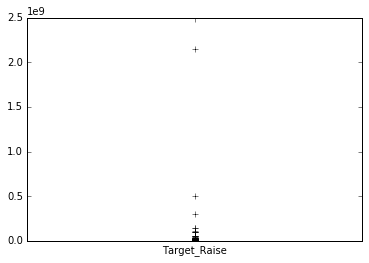

In [81]:
#### Distribution of each variable
df['Target_Raise'].plot(kind='box')

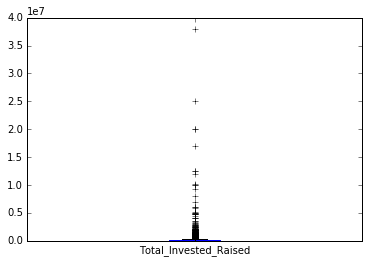

In [41]:
df['Total_Invested_Raised'].plot(kind='box')

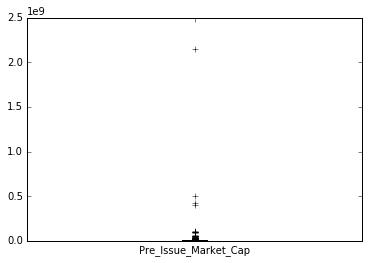

In [42]:
df['Pre_Issue_Market_Cap'].plot(kind='box')

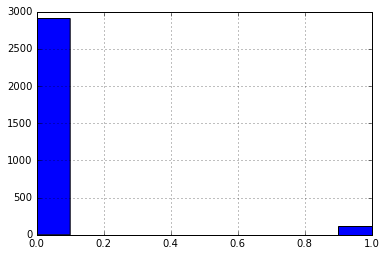

In [43]:
df['Success'].hist()
pl.show()

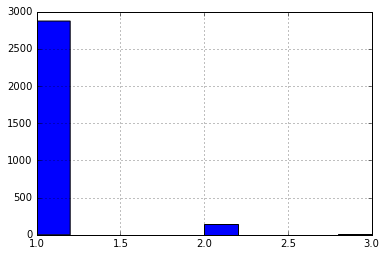

In [44]:
df['Strength'].hist()
pl.show()

In [45]:
df.corr()

,Target_Raise,Total_Invested_Raised,Pre_Issue_Market_Cap,Success,Strength
Target_Raise,1.000000,0.038912,0.012050,-0.007870,-0.011360
Total_Invested_Raised,0.038912,1.000000,-0.005252,0.165169,0.038371
Pre_Issue_Market_Cap,0.012050,-0.005252,1.000000,-0.002725,-0.016121
Success,-0.007870,0.165169,-0.002725,1.000000,0.358770
Strength,-0.011360,0.038371,-0.016121,0.358770,1.000000


In [46]:
#### Frequency Tables

In [47]:
print pd.crosstab(df['Success'], df['Strength'], rownames=['Success'])

Strength     1   2  3
Success              
0         2807  98  2
1           66  42  6


In [48]:
#### Dummy variables

In [49]:
dummy_ranks = pd.get_dummies(df['Strength'], prefix='Strength')
print dummy_ranks.head()

   Strength_1  Strength_2  Strength_3
0         1.0         0.0         0.0
1         1.0         0.0         0.0
2         1.0         0.0         0.0
3         1.0         0.0         0.0
4         1.0         0.0         0.0


In [50]:
#### Odds Ratios

In [51]:
cols_to_keep = ['Success', 'Target_Raise', 'Total_Invested_Raised', 'Pre_Issue_Market_Cap']
handCalc = df[cols_to_keep].join(dummy_ranks.ix[:, 'Strength_3':])
print handCalc.head()

   Success  Target_Raise  Total_Invested_Raised  Pre_Issue_Market_Cap  \
0        0        400000                 150000              10000000   
1        0         50000                      0                     0   
2        0       1500000                 485822               5000000   
3        0        100000                      0                666000   
4        0         10000                      0                     0   

   Strength_3  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  


In [52]:
#### Crosstab Strength 3 Success

In [53]:
#### Frequency Table cutting Strength 3 and whether or not company was successful reaching target raise

In [54]:
print pd.crosstab(handCalc['Success'], handCalc['Strength_3'], rownames=['Success'])

Strength_3   0.0  1.0
Success              
0           2905    2
1            108    6


In [55]:
#### Odds of successfully reaching target raise if company used an industry leading platform

In [56]:
odds_exposed = 6.0/2.0
odds_exposed

3.0

In [57]:
#### Calculate odds of success if company used an industry leading platform

In [58]:
odd_unexp = 108.0/2905.0
odd_unexp

0.03717728055077452

In [59]:
#### Calcualte the odds ratio

In [60]:
OR = odds_exposed/odd_unexp
OR

80.69444444444446

In [61]:
#### For companies that used an industry leading platform (Strength_3) the odds of successfully reaching target raise are 80 times the odds of companies who did not use an industry leading platform

In [62]:
#### Frequency Tables

In [63]:
print pd.crosstab(df['Success'], df['Strength'], rownames=['Success'])

Strength     1   2  3
Success              
0         2807  98  2
1           66  42  6


In [64]:
#### Dummy variables

In [65]:
dummy_ranks = pd.get_dummies(df['Strength'], prefix='Strength')
print dummy_ranks.head()

   Strength_1  Strength_2  Strength_3
0         1.0         0.0         0.0
1         1.0         0.0         0.0
2         1.0         0.0         0.0
3         1.0         0.0         0.0
4         1.0         0.0         0.0


In [66]:
#### Odds Ratios

In [67]:
cols_to_keep = ['Success', 'Target_Raise', 'Total_Invested_Raised', 'Pre_Issue_Market_Cap']
handCalc = df[cols_to_keep].join(dummy_ranks.ix[:, 'Strength_1':])
print handCalc.head()

   Success  Target_Raise  Total_Invested_Raised  Pre_Issue_Market_Cap  \
0        0        400000                 150000              10000000   
1        0         50000                      0                     0   
2        0       1500000                 485822               5000000   
3        0        100000                      0                666000   
4        0         10000                      0                     0   

   Strength_1  Strength_2  Strength_3  
0         1.0         0.0         0.0  
1         1.0         0.0         0.0  
2         1.0         0.0         0.0  
3         1.0         0.0         0.0  
4         1.0         0.0         0.0  


In [68]:
#### Crosstab Strength 1 Success

In [69]:
#### Frequency Table cutting Strength 1 and whether or not company was successful reaching target raise

In [70]:
print pd.crosstab(handCalc['Success'], handCalc['Strength_1'], rownames=['Success'])

Strength_1  0.0   1.0
Success              
0           100  2807
1            48    66


In [71]:
#### Odds of successfully reaching target raise if company does not use an industry leading platform

In [72]:
OR = (66.0*100.0)/(48*2807)
print OR

0.0489846811543


In [73]:
print .0489-1

-0.9511


In [74]:
#### The odds of successfully reaching target raise are 95% lower for companies who used a non-industry leading platform compared to companies who did not use a non-industry leading platform.  In other words, for companies who used a non-industry leading platform the odds of successfully reaching target raise are .0489 times the odds of companies who did not use a non-industry leading platform (Strength_1). 

In [75]:
#### Create a clean data frame fro the regression

In [124]:
cols_to_keep = ['Success', 'Target_Raise', 'Pre_Issue_Market_Cap']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'Strength_2':])
print data.head()

   Success  Target_Raise  Pre_Issue_Market_Cap  Strength_2  Strength_3
0        0        400000              10000000         0.0         0.0
1        0         50000                     0         0.0         0.0
2        0       1500000               5000000         0.0         0.0
3        0        100000                666000         0.0         0.0
4        0         10000                     0         0.0         0.0


In [297]:
#### Manually add the intercept

In [125]:
data['intercept'] = 1.0

In [126]:
#### Set the covariates to a variable called train_cols

In [128]:
train_cols = data.columns[1:]

In [301]:
#### Fit the model

In [129]:
logit = sm.Logit(data['Success'], data[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.133749
         Iterations 10


In [130]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                Success   No. Observations:                 3021
Model:                          Logit   Df Residuals:                     3016
Method:                           MLE   Df Model:                            4
Date:                Tue, 09 Aug 2016   Pseudo R-squ.:                  0.1676
Time:                        20:22:39   Log-Likelihood:                -404.06
converged:                       True   LL-Null:                       -485.42
                                        LLR p-value:                 3.813e-34
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Target_Raise         -1.541e-08   3.19e-08     -0.483      0.629     -7.79e-08  4.71e-08
Pre_Issue_Market_Cap  4.712e-10   1.95e-09      0.241      0.809     -3.35e-09   4.3e-09
Strength_2  

In [ ]:
#### Calculate the odds ratio of the coefficients and their 95% CI intervals

In [131]:
print np.exp(result.params)

Target_Raise              1.000000
Pre_Issue_Market_Cap      1.000000
Strength_2               17.941354
Strength_3              127.674920
intercept                 0.024020
dtype: float64


In [132]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5', '97.5', 'OR']
print np.exp(conf)

                            2.5        97.5          OR
Target_Raise           1.000000    1.000000    1.000000
Pre_Issue_Market_Cap   1.000000    1.000000    1.000000
Strength_2            11.553183   27.861773   17.941354
Strength_3            25.292871  644.485371  127.674920
intercept              0.018571    0.031068    0.024020


In [ ]:
#### Companies who used an average platform (Strength_2) had 18 times the odds of successfully reaching target raise compared to companies who used a non-industry leading platform (Strength_1). 

In [143]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [144]:
# instead of generating all possible values of Target_Raise, we're going
# to use an evenly spaced range of 10 values from the min to the max 
Target_Raises = np.linspace(data['Target_Raise'].min(), data['Target_Raise'].max(), 10)
print Target_Raises
Pre_Issue_Market_Caps = np.linspace(data['Pre_Issue_Market_Cap'].min(), data['Pre_Issue_Market_Cap'].max(), 10)
print Pre_Issue_Market_Caps
combos = pd.DataFrame(cartesian([Target_Raises, Pre_Issue_Market_Caps, [1000000, 2000000, 3000000, 4000000], [1000000.]]))

[  0.00000000e+00   2.38888889e+08   4.77777778e+08   7.16666667e+08
   9.55555556e+08   1.19444444e+09   1.43333333e+09   1.67222222e+09
   1.91111111e+09   2.15000000e+09]
[  0.00000000e+00   2.38609294e+08   4.77218588e+08   7.15827882e+08
   9.54437176e+08   1.19304647e+09   1.43165576e+09   1.67026506e+09
   1.90887435e+09   2.14748365e+09]


In [145]:
# Recreate the dummy variables and keep only what we need for making predictions

In [146]:
combos.columns = ['Target_Raise', 'Pre_Issue_Market_Cap', 'Strength', 'intercept']
dummy_ranks = pd.get_dummies(combos['Strength'], prefix='Strength')
dummy_ranks.columns = ['Strength_1', 'Strength_2', 'Strength_3', 'Strength_4']
cols_to_keep = ['Target_Raise', 'Pre_Issue_Market_Cap', 'Strength', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'Strength_2':])

In [147]:
#### Make predictions on the enumerated dataset

In [167]:
combos['Success_pred'] = result.predict(combos[train_cols])
print combos.tail()
len(combos)

     Target_Raise  Pre_Issue_Market_Cap   Strength  intercept  Strength_2  \
395  2.150000e+09          1.908874e+09  4000000.0  1000000.0         0.0   
396  2.150000e+09          2.147484e+09  1000000.0  1000000.0         0.0   
397  2.150000e+09          2.147484e+09  2000000.0  1000000.0         1.0   
398  2.150000e+09          2.147484e+09  3000000.0  1000000.0         0.0   
399  2.150000e+09          2.147484e+09  4000000.0  1000000.0         0.0   

     Strength_3  Strength_4  Success_pred  
395         0.0         1.0           0.0  
396         0.0         0.0           0.0  
397         0.0         0.0           0.0  
398         1.0         0.0           0.0  
399         0.0         1.0           0.0  


400

In [168]:
def isolate_and_plot(variable):
    # isolate Target_Raise and Strength
    grouped = pd.pivot_table(combos, values=['Success_pred'], index=[variable, 'Strength'],
    aggfunc=np.mean)

In [169]:
print grouped.head()

NameError: name 'grouped' is not defined

In [ ]:
#### Make a plot

In [161]:
colors = 'rbgyrbgy'
for col in combos.Strength.unique():
    plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
    pl.plot(plt_data.index.get_level_values(0), plt_data['Success_pred'],
            color=colors[int(col)])
    
pl.xlabel(variable)
pl.ylabel("P(Success=1)")
pl.legend(['1', '2', '3', '4'], loc='upper left', title='Strength')
pl.title("Prob(Success=1) isolating " + variable + " and Strength")
pl.show()

isolate_and_plot('Target_Raise')
isolate_and_plot('Pre_Issue_Market_Cap')

NameError: name 'grouped' is not defined